In [9]:
# manipulation data
import pandas as pd
import numpy as np

#visualiation data
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot

#default theme
plt.style.use('ggplot')
sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] =[8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [11]:
train = pd.read_csv('test.csv')
test = pd.read_csv('test.csv')
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [12]:
train.shape

(233599, 11)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


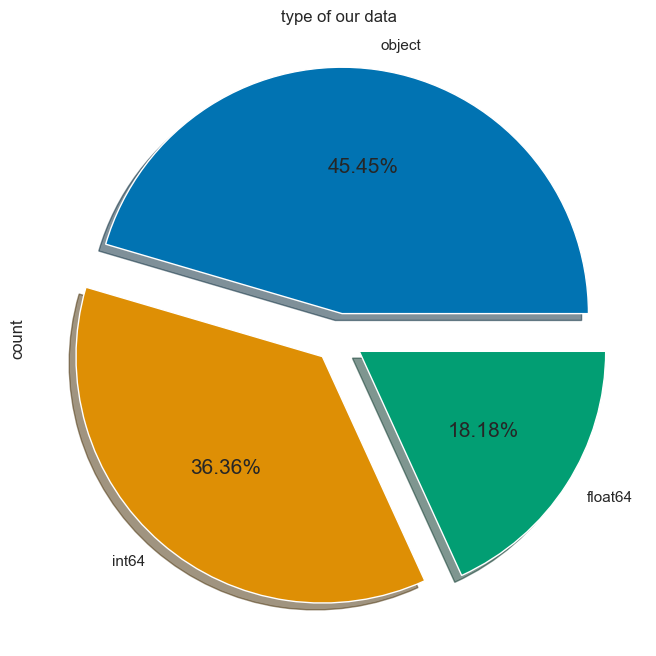

In [14]:
train.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.2f%%',shadow=True)
plt.title('type of our data');

In [18]:
num_columns = [f for f in train.columns if train.dtypes[f] != 'object']
if 'Purchase' in num_columns:
    num_columns.remove('Purchase')
if 'User_ID' in num_columns:
    num_columns.remove('User_ID')


In [19]:
# show the categorical values

cat_columns = [f for f in train.columns if train.dtypes[f] == 'object']
cat_columns

['Product_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

In [20]:
train.describe(include='all')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599,233599,233599,233599.000000,233599,233599,233599.000000,233599.000000,161255.000000,71037.000000
unique,NaN,3491,2,7,NaN,3,5,NaN,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN,NaN
freq,NaN,829,175772,93428,NaN,98566,82604,NaN,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.085407,NaN,NaN,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,NaN,NaN,NaN,6.521146,NaN,NaN,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,15.000000,16.000000


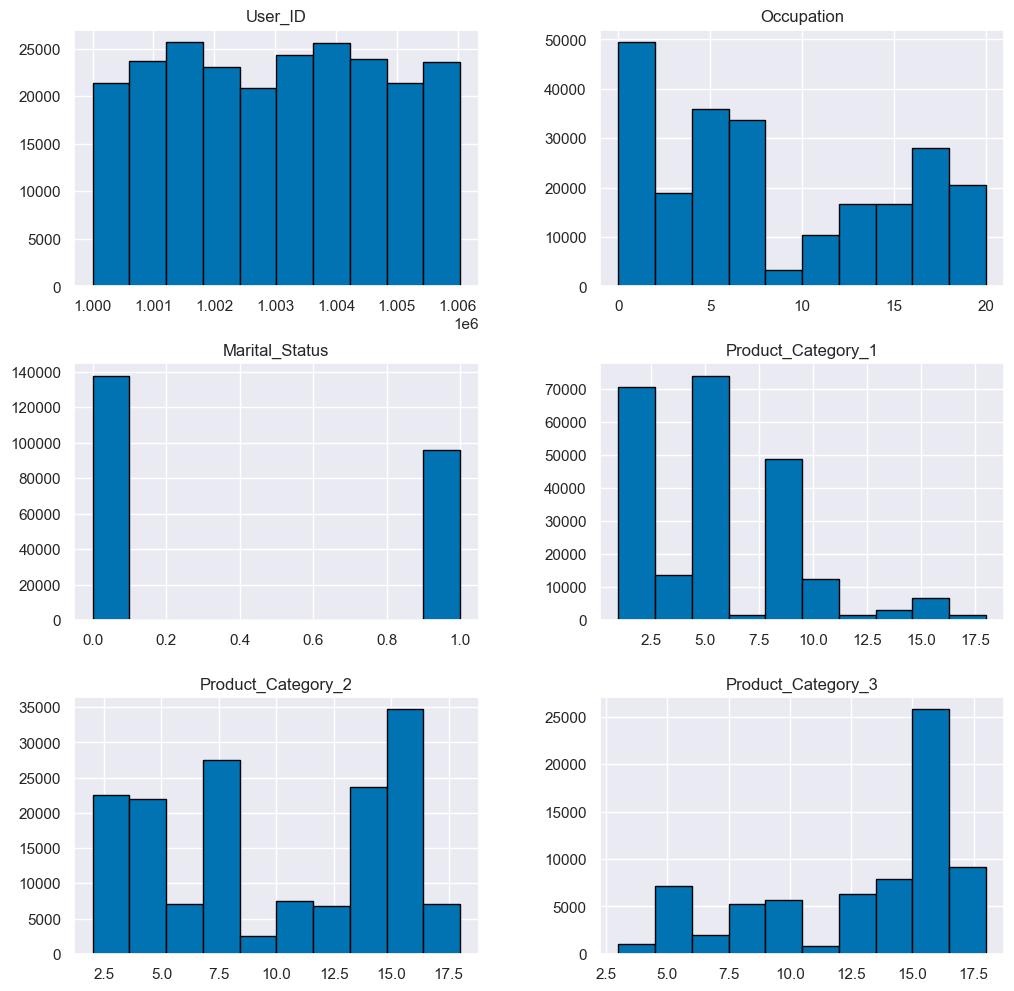

In [21]:
train.hist(edgecolor='black',figsize=(12,12));

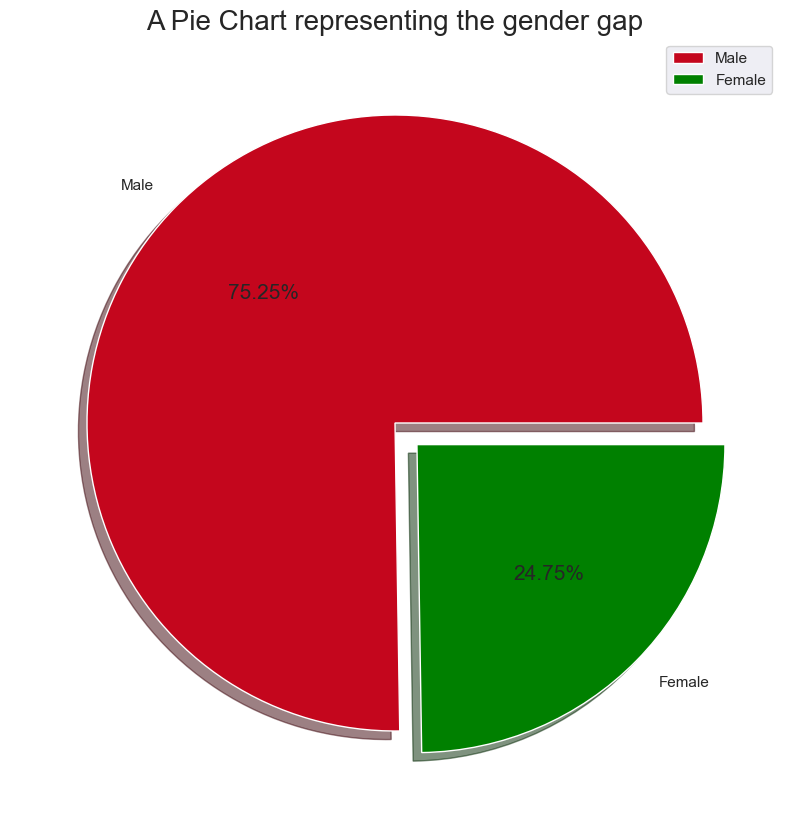

In [22]:
# pie chart 

size = train['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()


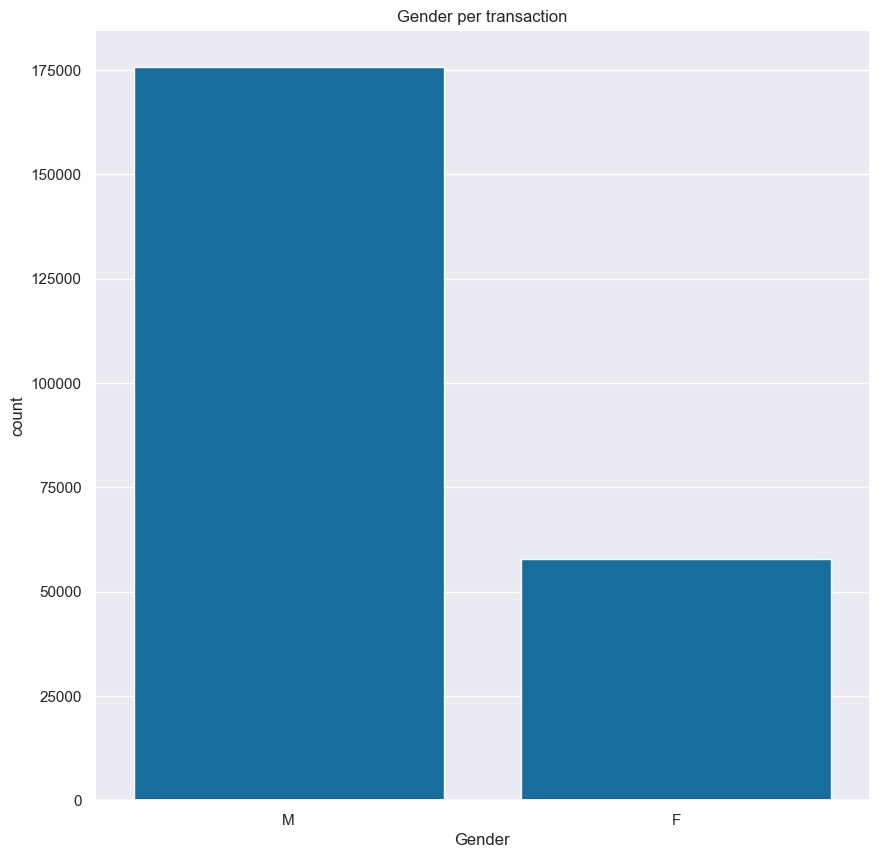

In [23]:
sns.countplot(x=train.Gender)
plt.title('Gender per transaction');